In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(training_imgs, training_labels), (testing_imgs, testing_labels) = tfds.as_numpy(tfds.load(
    "fashion_mnist", # name of dataset
    split = ["train", "test"], # generates an array of Dataset Adapters
    batch_size = -1,  # loads all the data
    as_supervised = True # makes sure that the return is a tuple of the form (input, label)
))

training_imgs = training_imgs/255.0
testing_imgs = testing_imgs/255.0

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(128, activation = "relu"),
    Dropout(0.2),
    Dense(10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(
    training_imgs, training_labels,
    epochs = 5
)


/Users/avitirto/anaconda3/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.7660 - loss: 0.6657
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8516 - loss: 0.4112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8636 - loss: 0.3741
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.8705 - loss: 0.3534
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8785 - loss: 0.3322


In [2]:
model.evaluate(testing_imgs, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8795 - loss: 0.3380


[0.3494609594345093, 0.8755999803543091]

In [3]:
def augmentation(img, label):
    img = tf.cast(img, tf.float32)
    img = (img/255) # normalization
    img = tf.image.random_flip_left_right(img)
    return img, label

data, info = tfds.load('horses_or_humans', split = 'train', as_supervised=True, with_info = True)
train_data = data.map(augmentation)
print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='/Users/avitirto/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


In [4]:
data = tfds.load("horses_or_humans", split = "test", as_supervised = True)
valid_data = data.batch(10)
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D

model = Sequential([
    BatchNormalization(),
    Conv2D(16, kernel_size = (3,3), activation = "relu", input_shape = (300, 300, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(32, kernel_size = (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Conv2D(64, kernel_size = (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Conv2D(64, kernel_size = (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Conv2D(64, kernel_size = (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

train_batches = train_data.shuffle(100).batch(10) # Shuffles and Makes batches of 10

history = model.fit(train_batches,
          epochs = 10,
          validation_data = valid_data,
          validation_steps = 1
         )

Epoch 1/10


/Users/avitirto/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 279ms/step - accuracy: 0.8238 - loss: 1.1448 - val_accuracy: 0.4000 - val_loss: 135.9653
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9550 - loss: 0.1339 - val_accuracy: 0.5000 - val_loss: 357.2610
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.9706 - loss: 0.0931 - val_accuracy: 0.8000 - val_loss: 38.4026
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.7000 - val_loss: 236.5831
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 1.0000 - loss: 5.9056e-04 - val_accuracy: 0.8000 - val_loss: 197.8401
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 30s 286ms/step - accuracy: 1.0000 - loss: 2.3787e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.4000 - val_loss: 338.6417
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 30s 294ms/step - accuracy: 0.91

2024-06-01 19:09:02.525683: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Maximum validation accuracy: 1.0


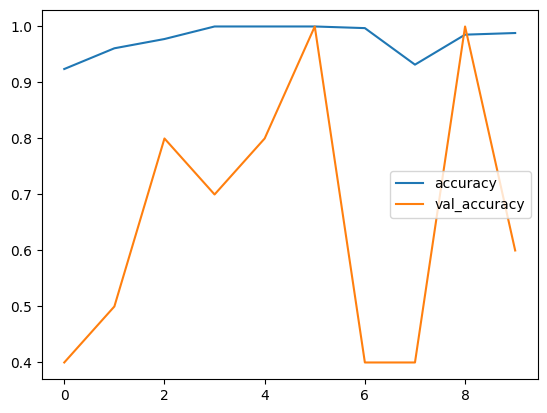

In [6]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))